In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('/Users/macbookpro/Desktop/TerraSafe/Machine Learning/noaa_ml.csv')

In [4]:
data['clase_sismo'] = pd.qcut(data['magnitudSismo'], q=5, labels=['Muy Leve', 'Leve', 'Medio', "Fuerte", "Muy Fuerte"])
data

,nombreUbicacion,latitud,longitud,magnitudSismo,tsunami,volcan,pais,profundidadSismo,intensidad,fecha,...,ordenCantidadMuertesActualizadas,lesionesActualizadas,ordenCantidadLesionesActualizadas,casasDanadasActualizadas,ordenCantidadCasasDanadasActualizadas,casasDestruidasActualizadas,ordenCantidadCasasDestruidasActualizadas,danosActualizados,ordenCantidadDanosActualizados,clase_sismo
0,JAPAN: UCHIURA BAY,42.070,140.680,6.5,1,1,JAPAN,40.153361,7.856559,1640-07-31,...,3.0,1.0,1.0,1.0,3.0,20.0,1.0,0.5,1.0,Medio
1,JAPAN: NEAR S COAST HONSHU: KOZU-SHIMA,34.221,139.131,6.1,1,1,JAPAN,10.000000,7.856559,2000-07-01,...,1.0,101.0,3.0,1.0,3.0,101.0,3.0,0.5,1.0,Leve
2,RWANDA: RUBAVU; CONGO,-1.601,29.400,4.7,0,1,RWANDA,10.000000,7.000000,2021-05-25,...,1.0,1.0,1.0,1.0,1.0,5000.0,4.0,5.0,3.0,Muy Leve
3,CHINA: SHAANXI PROVINCE,35.600,110.900,5.4,0,0,CHINA,40.153361,7.000000,1959-08-10,...,1.0,1.0,1.0,1.0,3.0,43.0,1.0,0.5,1.0,Muy Leve
4,"PERU: CAMANA, AREQUIPA",-16.660,-72.662,6.8,0,0,PERU,87.000000,6.000000,1999-04-03,...,1.0,50.0,1.0,300.0,3.0,101.0,3.0,1.0,2.0,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,PERU,-16.300,-71.000,8.0,0,0,PERU,25.000000,9.000000,1471-00-00,...,1.0,1.0,1.0,1.0,3.0,101.0,3.0,1.0,2.0,Muy Fuerte
4582,"INDONESIA: JAVA: LABUHAN, MENES, PONOROGO",-6.400,105.400,6.6,1,0,INDONESIA,64.000000,7.856559,1963-12-16,...,1.0,1.0,1.0,1.0,1.0,101.0,3.0,0.5,1.0,Medio
4583,CHINA: TIBET (XIZANG PROVINCE),29.807,90.350,6.3,0,0,CHINA,12.000000,7.856559,2008-10-06,...,1.0,19.0,1.0,1.0,3.0,101.0,3.0,1.0,2.0,Medio
4584,PERU,-12.200,-77.600,7.8,0,0,PERU,30.000000,7.000000,1582-08-15,...,1.0,1.0,1.0,1.0,3.0,101.0,3.0,1.0,2.0,Muy Fuerte


In [9]:
# Supongamos que tienes un DataFrame llamado 'data' que contiene tus datos de sismos

# Divide los datos en características (X) y etiquetas/clases (y)
X = data[['magnitudSismo','profundidadSismo','intensidad','ordenCantidadMuertesActualizadas','ordenCantidadCasasDestruidasActualizadas']]
y = data['clase_sismo']  # Reemplaza 'etiqueta_de_clase' con la columna que contiene las etiquetas/clases de los sismos


In [12]:
from sklearn.model_selection import train_test_split


X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [14]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear', random_state=0)

In [15]:
Y_Pred = classifier.predict(X_Test)

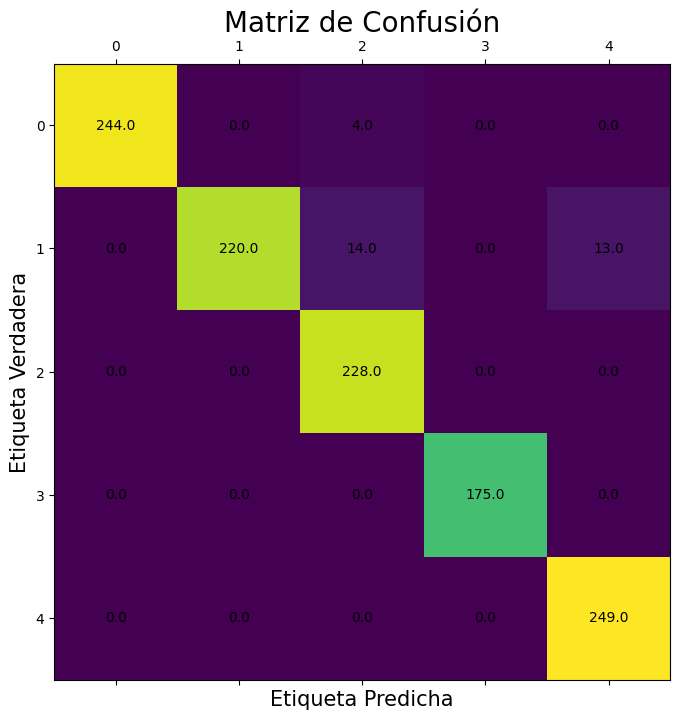

In [18]:
# Matriz de confusión 

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_Test, Y_Pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [19]:
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

      Fuerte       1.00      0.98      0.99       248
        Leve       1.00      0.89      0.94       247
       Medio       0.93      1.00      0.96       228
  Muy Fuerte       1.00      1.00      1.00       175
    Muy Leve       0.95      1.00      0.97       249

    accuracy                           0.97      1147
   macro avg       0.98      0.97      0.97      1147
weighted avg       0.97      0.97      0.97      1147



In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y_Pred, cmap='coolwarm')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de Dispersión del Modelo de Regresión Logística')
plt.show()


InvalidIndexError: (slice(None, None, None), 0)

<Figure size 1000x600 with 0 Axes>

In [20]:
# Set de entrenamiento

from matplotlib.colors import ListedColormap

X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(14,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = [ListedColormap(('red', 'green'))(i)], label = j)
plt.title('Support Vector Machine (Set de Entrenamiento)', fontsize=20)
plt.xlabel('magnitudSismo', fontsize=15)
plt.ylabel('muertesActualizadas', fontsize=15)
plt.legend()
plt.show()

ValueError: X has 2 features, but SVC is expecting 5 features as input.

<Figure size 1400x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de Dispersión del Modelo de Regresión Logística')
plt.show()
